In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#coordinates

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


atuona pf
tiksi ru
rikitea pf
abbeville us
yuryevets ru
elmadag tr
boone us
tshikapa cd
mataura pf
antalaha mg
ushuaia ar
busselton au
mar del plata ar
westport ie
carnarvon au
avarua ck
bluff nz
butaritari ki
henties bay na
busselton au
yellowknife ca
san patricio mx
busselton au
ushuaia ar
san patricio mx
bluff nz
chyhyryn ua
georgetown sh
yulara au
gazojak tm
samarinda id
angoche mz
helena us
new norfolk au
rikitea pf
tuktoyaktuk ca
qingan cn
baykit ru
leningradskiy ru
vaini to
atuona pf
luba gq
shaowu cn
sentyabrskiy ru
mataura pf
konya tr
atuona pf
vaini to
hilo us
hambantota lk
narsaq gl
srednekolymsk ru
kendari id
albany au
qandahar af
khatanga ru
bluff nz
torbay ca
seymchan ru
thompson ca
mataura pf
taolanaro mg
hithadhoo mv
tuatapere nz
busselton au
albany au
siraha np
maykain kz
barrow us
yar-sale ru
kaitangata nz
lorengau pg
punta arenas cl
salalah om
saskylakh ru
punta arenas cl
bredasdorp za
carnarvon au
port lincoln au
ambilobe mg
saint george bm
columbia us
atuona pf
pan

taburi ph
mataura pf
san juan us
srednekolymsk ru
albany au
kahului us
puerto narino co
braganca pt
iqaluit ca
habiganj bd
esperance au
bambous virieux mu
shingu jp
zaltan ly
antofagasta cl
hammerfest no
albany au
albany au
mataura pf
zhanakorgan kz
usinsk ru
ushuaia ar
hermanus za
punta arenas cl
gushikawa jp
saskylakh ru
ribeira grande pt
hervey bay au
bluff nz
albany au
east london za
busselton au
ca mau vn
thompson ca
ancud cl
paita pe
nelson bay au
port hardy ca
jamestown sh
khatanga ru
zabol ir
cape town za
nizhneyansk ru
saskylakh ru
ushuaia ar
albany au
cidreira br
rafaela ar
smithers ca
dikson ru
ofaqim il
bay roberts ca
dalby au
payakumbuh id
anadyr ru
hervey bay au
nizhneyansk ru
vaini to
torbay ca
taolanaro mg
albany au
port alfred za
cidreira br
bambous virieux mu
east london za
cherskiy ru
charters towers au
victoria sc
illoqqortoormiut gl
busselton au
sur om
bethel us
pitimbu br
ulcinj me
minab ir
vaini to
caribou us
kavaratti in
rikitea pf
puerto ayora ec
coquimbo cl
sa

port alfred za
toliary mg
piacabucu br
yar-sale ru
half moon bay us
taolanaro mg
mount isa au
norton zw
mzimba mw
upernavik gl
belushya guba ru
klaksvik fo
sangar ru
cidreira br
belushya guba ru
airai pw
alofi nu
marsa matruh eg
atuona pf
willowmore za
albany au
illoqqortoormiut gl
chuy uy
butaritari ki
parnamirim br
barentsburg sj


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    #i is the index and city is the value in the list

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #city.replace(" ", "+") gets rid of blank spaces and replaces a + becuase that's how a url reads spaces
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | abbeville
Processing Record 5 of Set 1 | yuryevets
Processing Record 6 of Set 1 | elmadag
Processing Record 7 of Set 1 | boone
Processing Record 8 of Set 1 | tshikapa
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | antalaha
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | westport
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | henties bay
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set 1 | chyhyryn
Processing Record 23 of Set 1 | georgetown


Processing Record 40 of Set 4 | nemuro
Processing Record 41 of Set 4 | cherskiy
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | ojinaga
Processing Record 44 of Set 4 | inuvik
Processing Record 45 of Set 4 | galgani
City not found. Skipping...
Processing Record 46 of Set 4 | saiha
Processing Record 47 of Set 4 | baran
Processing Record 48 of Set 4 | ciudad bolivar
Processing Record 49 of Set 4 | castro
Processing Record 50 of Set 4 | jawhar
Processing Record 1 of Set 5 | kresttsy
Processing Record 2 of Set 5 | erzincan
Processing Record 3 of Set 5 | sulangan
Processing Record 4 of Set 5 | puerto colombia
Processing Record 5 of Set 5 | iisalmi
Processing Record 6 of Set 5 | klaksvik
Processing Record 7 of Set 5 | maniitsoq
Processing Record 8 of Set 5 | kristiinankaupunki
Processing Record 9 of Set 5 | samusu
City not found. Skipping...
Processing Record 10 of Set 5 | krutinka
Processing Record 11 of Set 5 | kuching
Processing Record 12 of Set 5 | kavieng
Pr

Processing Record 28 of Set 8 | viransehir
Processing Record 29 of Set 8 | kommunisticheskiy
Processing Record 30 of Set 8 | miracema do tocantins
Processing Record 31 of Set 8 | bendigo
Processing Record 32 of Set 8 | kamsack
Processing Record 33 of Set 8 | marienburg
Processing Record 34 of Set 8 | orimattila
Processing Record 35 of Set 8 | ketchikan
Processing Record 36 of Set 8 | sitka
Processing Record 37 of Set 8 | along
Processing Record 38 of Set 8 | san andres
Processing Record 39 of Set 8 | naryan-mar
Processing Record 40 of Set 8 | nichinan
Processing Record 41 of Set 8 | yukhnov
Processing Record 42 of Set 8 | maksatikha
Processing Record 43 of Set 8 | kununurra
Processing Record 44 of Set 8 | ziguinchor
Processing Record 45 of Set 8 | powell
Processing Record 46 of Set 8 | bemidji
Processing Record 47 of Set 8 | norman wells
Processing Record 48 of Set 8 | hamilton
Processing Record 49 of Set 8 | talnakh
Processing Record 50 of Set 8 | encinitas
Processing Record 1 of Set 

Processing Record 20 of Set 12 | los llanos de aridane
Processing Record 21 of Set 12 | omboue
Processing Record 22 of Set 12 | saldanha
Processing Record 23 of Set 12 | plettenberg bay
Processing Record 24 of Set 12 | aleksandrov gay
Processing Record 25 of Set 12 | port hedland
Processing Record 26 of Set 12 | kieta
Processing Record 27 of Set 12 | san lawrenz
Processing Record 28 of Set 12 | torrington
Processing Record 29 of Set 12 | pula
Processing Record 30 of Set 12 | coahuayana
Processing Record 31 of Set 12 | morada nova
Processing Record 32 of Set 12 | rafai
Processing Record 33 of Set 12 | graaff-reinet
Processing Record 34 of Set 12 | goderich
Processing Record 35 of Set 12 | luganville
Processing Record 36 of Set 12 | shieli
Processing Record 37 of Set 12 | lewistown
Processing Record 38 of Set 12 | timbiras
Processing Record 39 of Set 12 | tahta
Processing Record 40 of Set 12 | uchiza
Processing Record 41 of Set 12 | shwebo
Processing Record 42 of Set 12 | amapa
Processin

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.06,67,5,11.03,PF,2021-10-30 04:04:03
1,Tiksi,71.6872,128.8694,-2.47,98,97,7.56,RU,2021-10-30 04:04:03
2,Rikitea,-23.1203,-134.9692,75.24,82,99,16.11,PF,2021-10-30 04:04:03
3,Abbeville,50.1000,1.8333,56.50,92,95,15.82,FR,2021-10-30 04:04:03
4,Yuryevets,57.3201,43.1041,43.68,91,100,14.74,RU,2021-10-30 04:04:04
5,Elmadag,39.9208,33.2308,38.34,88,0,5.64,TR,2021-10-30 04:04:04
6,Boone,39.0334,-92.3335,51.40,95,97,5.01,US,2021-10-30 03:59:57
7,Tshikapa,-6.4167,20.8000,68.25,98,100,1.70,CD,2021-10-30 04:04:04
8,Mataura,-46.1927,168.8643,74.32,39,78,4.18,NZ,2021-10-30 04:04:05
9,Antalaha,-14.9003,50.2788,74.35,82,100,5.97,MG,2021-10-30 04:04:05


In [15]:
city_data_df_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_df_column]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-10-30 04:04:03,-9.8000,-139.0333,78.06,67,5,11.03
1,Tiksi,RU,2021-10-30 04:04:03,71.6872,128.8694,-2.47,98,97,7.56
2,Rikitea,PF,2021-10-30 04:04:03,-23.1203,-134.9692,75.24,82,99,16.11
3,Abbeville,FR,2021-10-30 04:04:03,50.1000,1.8333,56.50,92,95,15.82
4,Yuryevets,RU,2021-10-30 04:04:04,57.3201,43.1041,43.68,91,100,14.74
...,...,...,...,...,...,...,...,...,...
558,Norton,ZW,2021-10-30 04:18:50,-17.8833,30.7000,61.29,63,3,4.74
559,Mzimba,MW,2021-10-30 04:18:50,-11.9000,33.6000,64.51,67,68,6.98
560,Sangar,RU,2021-10-30 04:18:51,63.9242,127.4739,4.15,96,100,4.36
561,Willowmore,ZA,2021-10-30 04:18:51,-33.2926,23.4895,54.30,76,22,4.00


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
lngs = city_data_df["Lng"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/30/21'

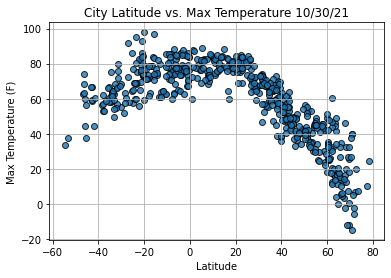

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

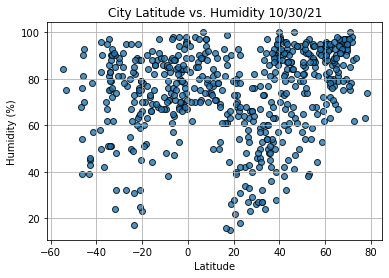

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

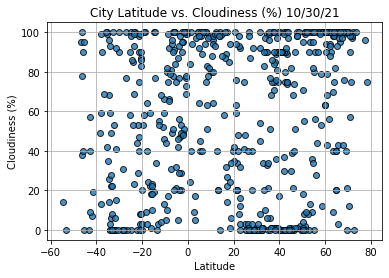

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

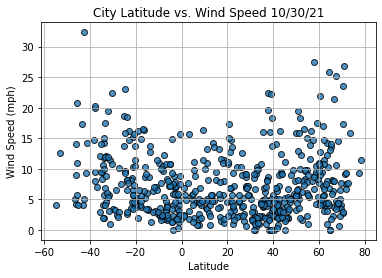

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()